In [1]:
options(stringsAsFactors=FALSE)

In [2]:
library(data.table)
library(cowplot)
library(Matrix)
library(BuenColors)

Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: MASS


In [3]:
metrics_pctcells = read.csv('./peaks_frequency_results/metrics/clustering_scores.csv',
                         row.names=1)
metrics_pctcells[['cutoff']] = as.numeric(substring(rownames(metrics_pctcells),15))

metrics_nreads = read.csv('./peaks_intensity_results/metrics/clustering_scores.csv',
                         row.names=1)
metrics_nreads[['cutoff']] = as.numeric(substring(rownames(metrics_pctcells),15))

In [4]:
head(metrics_nreads)

,ARI_Louvain,ARI_kmeans,ARI_HC,AMI_Louvain,AMI_kmeans,AMI_HC,Homogeneity_Louvain,Homogeneity_kmeans,Homogeneity_HC,cutoff
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cusanovich20181,0.5511857,-0.001941638,-0.001941638,0.6710551,-0.002788413,-0.002788413,0.6859647,0.003021876,0.003021876,1.0
Cusanovich20180.8,0.5406995,-0.001941638,-0.001941638,0.6697614,-0.002788413,-0.002788413,0.6802875,0.003021876,0.003021876,0.8
Cusanovich20180.6,0.6045859,-0.001941638,-0.001941638,0.6939827,-0.002788413,-0.002788413,0.7033599,0.003021876,0.003021876,0.6
Cusanovich20180.4,0.5306475,-0.001941638,-0.001941638,0.6634529,-0.002788413,-0.002788413,0.6747860,0.003021876,0.003021876,0.4
Cusanovich20180.2,0.4614943,-0.001941638,-0.001941638,0.6252121,-0.002788413,-0.002788413,0.6388297,0.003021876,0.003021876,0.2
Cusanovich20180.1,0.4205678,-0.001941638,-0.001941638,0.5873225,-0.002788413,-0.002788413,0.5965390,0.003021876,0.003021876,0.1


In [5]:
head(metrics_pctcells)

,ARI_Louvain,ARI_kmeans,ARI_HC,AMI_Louvain,AMI_kmeans,AMI_HC,Homogeneity_Louvain,Homogeneity_kmeans,Homogeneity_HC,cutoff
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cusanovich20181,0.5511857,-0.001941638,-0.001941638,0.6710551,-0.002788413,-0.002788413,0.6859647,0.003021876,0.003021876,1.0
Cusanovich20180.8,0.5369081,-0.001941638,-0.001941638,0.6664837,-0.002788413,-0.002788413,0.6766760,0.003021876,0.003021876,0.8
Cusanovich20180.6,0.5423680,-0.001941638,-0.001941638,0.6686755,-0.002788413,-0.002788413,0.6788856,0.003021876,0.003021876,0.6
Cusanovich20180.4,0.5195560,-0.001941638,-0.001941638,0.6594286,-0.002788413,-0.002788413,0.6708581,0.003021876,0.003021876,0.4
Cusanovich20180.2,0.4610268,-0.001941638,-0.001941638,0.6185901,-0.002788413,-0.002788413,0.6281229,0.003021876,0.003021876,0.2
Cusanovich20180.1,0.4318749,-0.001941638,-0.001941638,0.5920548,-0.002788413,-0.002788413,0.6062477,0.003021876,0.003021876,0.1


In [6]:
df_merge = rbind(metrics_pctcells,metrics_nreads)

In [7]:
df_merge[['group']] = c(rep('Fequency',dim(metrics_pctcells)[1]),rep('Intensity',dim(metrics_nreads)[1]))

In [8]:
df_merge[['ID']] = rownames(df_merge)

In [9]:
df_merge_new = data.frame(name=character(0),group= character(0), clustering= character(0), 
                          metric = character(0),value = numeric(0),cutoff=numeric(0),stringsAsFactors=FALSE)

In [10]:
for(x in rownames(df_merge)){
    for (y in colnames(df_merge)[1:9]){
        str_split = strsplit(y,'_')[[1]]
        x_metric = str_split[1]
        x_clustering = str_split[2]
        x_value = df_merge[x,y]
        new_row = list(name=x,group=df_merge[x,'group'],clustering=x_clustering,
                       metric=x_metric,value=x_value,cutoff=df_merge[x,'cutoff'])
        df_merge_new = rbind(df_merge_new,new_row)
    }
}

In [11]:
df_merge_new[df_merge_new=="louvain"]<-'Louvain'
df_merge_new[df_merge_new=="hc"]<-'HC'

In [12]:
df_merge_new

name,group,clustering,metric,value,cutoff
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Cusanovich20181,Fequency,Louvain,ARI,0.551185718,1.0
Cusanovich20181,Fequency,kmeans,ARI,-0.001941638,1.0
Cusanovich20181,Fequency,HC,ARI,-0.001941638,1.0
Cusanovich20181,Fequency,Louvain,AMI,0.671055142,1.0
Cusanovich20181,Fequency,kmeans,AMI,-0.002788413,1.0
Cusanovich20181,Fequency,HC,AMI,-0.002788413,1.0
Cusanovich20181,Fequency,Louvain,Homogeneity,0.685964707,1.0
Cusanovich20181,Fequency,kmeans,Homogeneity,0.003021876,1.0
Cusanovich20181,Fequency,HC,Homogeneity,0.003021876,1.0


In [13]:
min(df_merge_new$value)

[1] -0.002788413

In [14]:
p <- ggplot(df_merge_new, aes(cutoff, value,color=factor(group))) + 
        geom_point(size=2,alpha=0.8)+
        geom_line(size=1.5,alpha=0.8) + 
        theme_bw() +
        theme(legend.position='top',
              text = element_text(colour = "black"),
              axis.text.x = element_text(color = "black"),
              axis.text.y = element_text(color = "black"),
              axis.title.x = element_text(color = 'black'),
              axis.title.y = element_text(color = 'black')) +
        xlab('Cutoff') + ylab('Score')+
        ylim(-0.05, 1)+
        labs(color='peak selection')+
        scale_x_reverse()

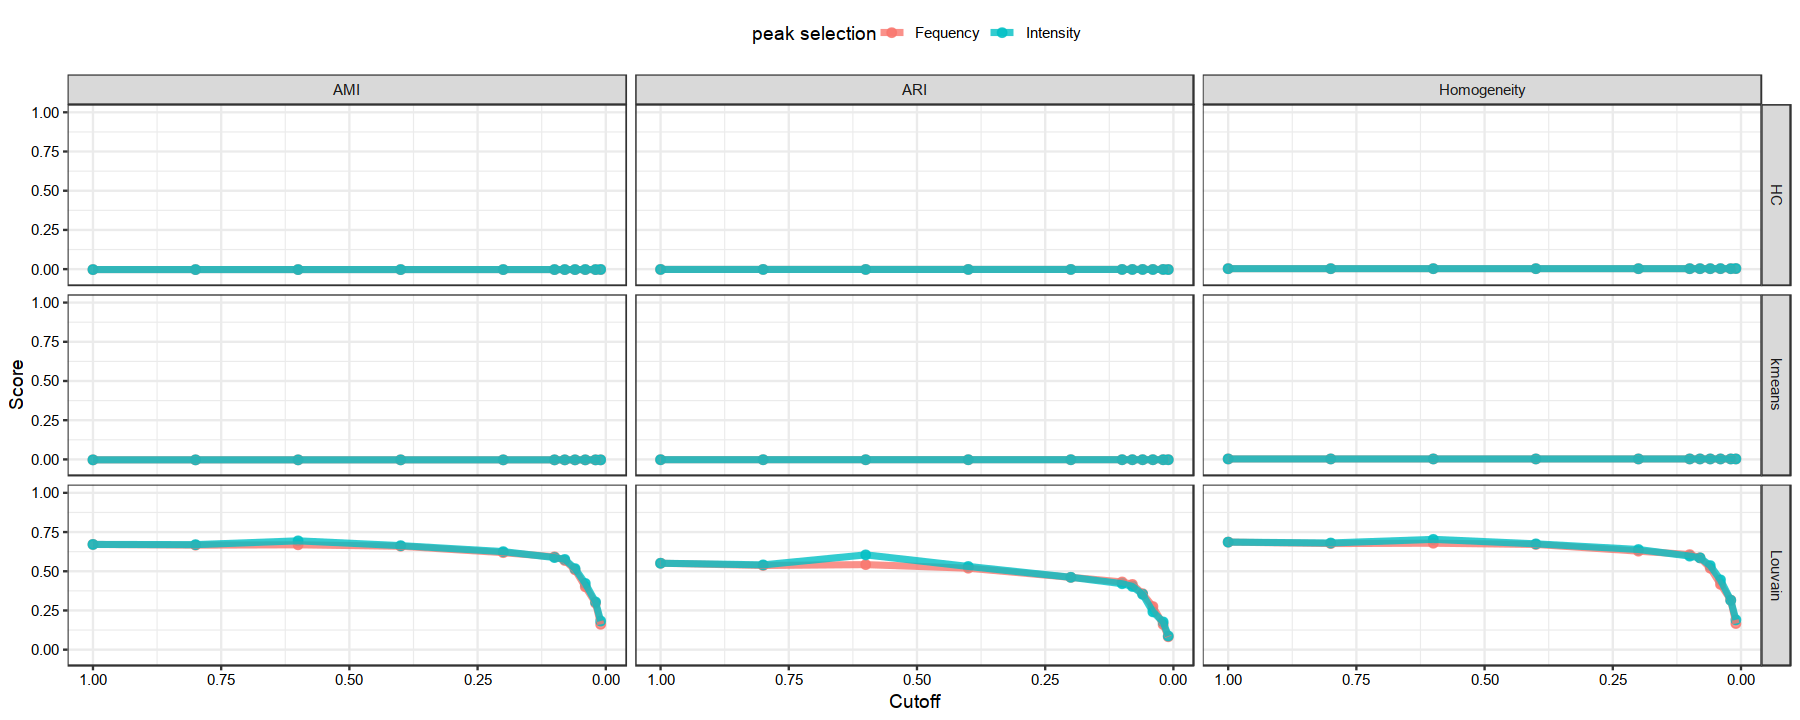

In [17]:
options(repr.plot.width=3*5, repr.plot.height=3*2)
p + facet_grid(vars(clustering), vars(metric))

In [18]:
ggsave(p + facet_grid(vars(clustering), vars(metric)),filename = 'Cusanovich2018_buenrostro.pdf',width = 3*5, height = 3*2)